In [1]:
import pickle
import time
import numpy as np
#from scipy import signal
import matplotlib.pyplot as plt
#import connectivity_measures as cm

In [2]:
IDs = ['SERT1597', 'SERT1659', 'SERT1678', 'SERT1908',
       'SERT1984', 'SERT1985', 'SERT2014', 'SERT1668',
       'SERT1665', 'SERT2018', 'SERT2024', 'SERT2013']

WT_list = ['SERT1597', 'SERT1659', 'SERT1678', 'SERT1908', 'SERT1984', 'SERT1985', 'SERT2014']


In [3]:
grandAverage = {'WTs': {'theta': [], 'beta': [], 'low_gamma': []}, 'KOs': {'theta': [], 'beta': [], 'low_gamma': []}}
iteration_WT = 0
iteration_KO = 0

method = 'icoh2' #'pli'

print('Collecting epochs...')
for mouse in IDs: 
    npys_dir = '/home/maspe/filer/SERT/' + mouse + '/npys/'
    
    ### Loading data
    data = pickle.load(open(npys_dir + mouse + '.' + method, 'rb')) #, encoding='latin1')
    
    pre_post = dict()
    for band in ['theta', 'beta', 'low_gamma']:
        if len(data[band]['pre'].shape) > 2: 
            pre = np.mean(data[band]['pre'], axis=2)
            post = np.mean(data[band]['post'], axis=2)
        else:
            pre = data[band]['pre']
            post = data[band]['post']
        
        pre_post[band] = post
        i_lower  = np.tril_indices(post.shape[0], 0)
        pre_post[band][i_lower] = pre[i_lower] 
        
        
        if mouse in WT_list:
            print('Averaging for WT mouse {}...'.format(mouse))
            if iteration_WT == 0:
                grandAverage['WTs'][band] = pre_post[band]
            else:
                grandAverage['WTs'][band] = np.dstack((grandAverage['WTs'][band], pre_post[band]))
        else:
            print('Averaging for KO mouse {}...'.format(mouse))
            if iteration_KO == 0:
                grandAverage['KOs'][band] = pre_post[band]
            else:
                grandAverage['KOs'][band] = np.dstack((grandAverage['KOs'][band], pre_post[band]))
            
    if mouse in WT_list:
        iteration_WT += 1
    else:
        iteration_KO += 1

        
print('Done!')

Averaging for WT mouse SERT1597...
Averaging for WT mouse SERT1597...
Averaging for WT mouse SERT1597...
Averaging for WT mouse SERT1659...
Averaging for WT mouse SERT1659...
Averaging for WT mouse SERT1659...
Averaging for WT mouse SERT1678...
Averaging for WT mouse SERT1678...
Averaging for WT mouse SERT1678...
Averaging for WT mouse SERT1908...
Averaging for WT mouse SERT1908...
Averaging for WT mouse SERT1908...
Averaging for WT mouse SERT1984...
Averaging for WT mouse SERT1984...
Averaging for WT mouse SERT1984...
Averaging for WT mouse SERT1985...
Averaging for WT mouse SERT1985...
Averaging for WT mouse SERT1985...
Averaging for WT mouse SERT2014...
Averaging for WT mouse SERT2014...
Averaging for WT mouse SERT2014...
Averaging for KO mouse SERT1668...
Averaging for KO mouse SERT1668...
Averaging for KO mouse SERT1668...
Averaging for KO mouse SERT1665...
Averaging for KO mouse SERT1665...
Averaging for KO mouse SERT1665...
Averaging for KO mouse SERT2018...
Averaging for KO mou

### Plotting

<Figure size 5400x5400 with 0 Axes>

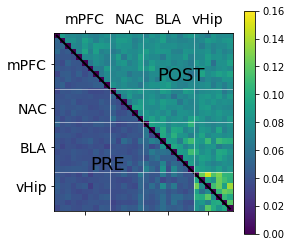

<Figure size 5400x5400 with 0 Axes>

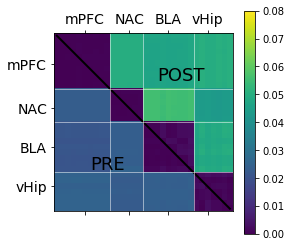

<Figure size 5400x5400 with 0 Axes>

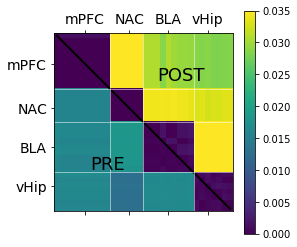

<Figure size 5400x5400 with 0 Axes>

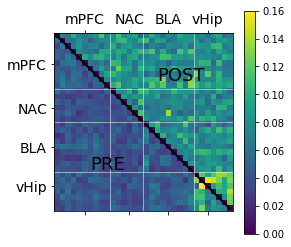

<Figure size 5400x5400 with 0 Axes>

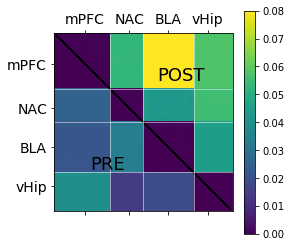

<Figure size 5400x5400 with 0 Axes>

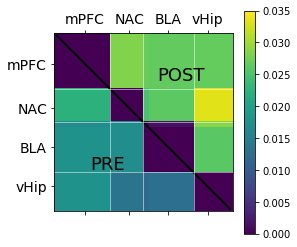

In [5]:
conditions = ['WTs', 'KOs']
bands      = ['theta', 'beta', 'low_gamma']


#conditions = ['KOs']
#bands      = ['beta']

mycolormap = {'theta': (0,0.16), 'beta': (0,0.08), 'low_gamma': (0,0.035)}

for condition in conditions:
    for band in bands:
        plt.figure(figsize=(75,75))
        plt.matshow(np.mean(grandAverage[condition][band], axis=2))
        plt.plot(np.arange(0,32), color='black', linewidth=2)

        for line_pos in [9.5, 15.5, 24.5]:
            plt.axvline(x=line_pos, color='white', linewidth=0.5)
            plt.axhline(y=line_pos, color='white', linewidth=0.5)

        plt.xticks([5,13,20,27], ['mPFC', 'NAC', 'BLA', 'vHip'], rotation=0, fontsize=14)
        plt.yticks([5,13,20,27], ['mPFC', 'NAC', 'BLA', 'vHip'], rotation=0, fontsize=14)

        plt.text(6,24,'PRE', fontsize=18)
        plt.text(18,8,'POST', fontsize=18)

        plt.colorbar()
        plt.clim(mycolormap[band][0], mycolormap[band][1])

        plt.savefig('/home/maspe/filer/SERT/ALL/figs/{} {} synchrony2.png'.format(condition, band), dpi=150, format='png')

